<a href="https://colab.research.google.com/github/Urooj-naveed/Neural-Networt/blob/main/NN_classification_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

# New section

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


            x1        y1 class
0    -0.701363 -1.711962     0
7    -1.101435  0.471253     0
8    -1.175918 -1.307611     0
15   -1.938436 -0.124953     0
23   -0.543596 -0.897553     0
...        ...       ...   ...
3972  0.236968 -1.190824     0
3978  0.078582 -1.023373     0
3990  0.012895 -1.573567     0
3998  0.174603 -1.269183     0
3999  0.037281 -1.708484     0

[656 rows x 3 columns]
            x1        y1 class
1     0.293044  0.046992     1
10    1.905400 -0.730763     1
17    0.757217 -2.636171     1
19    1.309646 -0.487444     1
27    1.111442 -2.380961     1
...        ...       ...   ...
3984 -0.948763  0.268648     1
3985 -0.171725 -0.468379     1
3987 -0.325241 -0.454711     1
3990 -0.620301 -0.107878     1
3999 -0.015040 -0.292575     1

[633 rows x 3 columns]
Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.6750 - accuracy: 0.4743 - val_loss: 0.6440 - val_accuracy: 0.5659
Epoch 2/100
200/200 [==============================] - 1s 3ms/ste

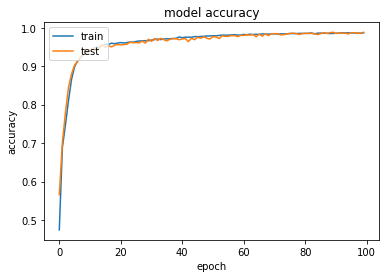

41/41 [==============================] - 0s 2ms/step


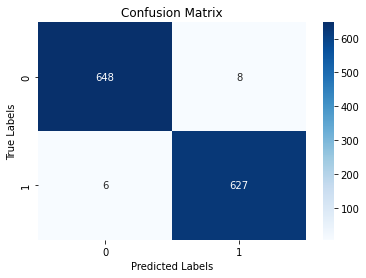

In [37]:
from scipy.sparse import coo_matrix
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns

n_data_points = 2000

def regionC1(rad, thk, b, a):
  c1 = np.array([(rad+thk)/2, 0])

  # We use random radius in the interval [rad, rad+thk]
  # and random angles from 0 to pi radians.
  r1 = np.random.rand(n_data_points)*thk+rad
  a1 = np.random.rand(n_data_points)*np.pi+np.pi/2
  #conversion to cartesian:
  p1 = np.array((r1*np.cos(a1)+a, r1*np.sin(a1)))
  x1, y1 = (p1[0] - c1[0], p1[1] - c1[1])
  
  #plt.scatter(x1, y1, marker='.', linewidths=0.1)

  #creating DataFrames
  return x1, y1
  
def regionC2(rad, thk, b, a):
  c2 =  np.array([-(rad+thk)/2, 0])
  r2 = np.random.rand(n_data_points)*thk+rad
  a2 = np.random.rand(n_data_points)*np.pi-np.pi/2
  p2 = np.array((r2*np.cos(a2)+b, r2*np.sin(a2)-1))
  x2, y2 = (p2[0] - c2[0], p2[1] - c2[1])
  
  #plt.scatter(x2, y2, marker='.', linewidths=0.1)
  return x2, y2

if __name__ == '__main__':

 C1 = regionC1(1, 1, -1,1)
 C2 = regionC2(1, 1, -1,1)
 Cg = regionC2(0, 1, -0.5, 0.5)
 Cr = regionC1(0, 1, -0.5, 0.5)
 ConC1 = np.concatenate((C1, Cg), axis=1)
 ConC2 = np.concatenate((C2, Cr), axis=1)
 
 #print (ConC1, ConC2)
 #creating DataFrames
 data_C1 = pd.DataFrame(ConC1).T
 data_C1.columns = ['x1', 'y1']
 data_C1['class'] = '0'
 #print (data_C1)
 
 data_C2 = pd.DataFrame(ConC2).T
 data_C2.columns = ['x1', 'y1']
 data_C2['class'] = '1'
 
 #print (data_C2)

 msk1 = np.random.rand(len(data_C1)) < 0.8
 trainC1 = data_C1[msk1]
 testC1 = data_C1[~msk1]
 msk3 = np.random.rand(len(testC1)) < 0.2
 predictC1 = testC1[~msk3]
 print(predictC1)

 msk2 = np.random.rand(len(data_C2)) < 0.8
 trainC2 = data_C2[msk2]
 testC2 = data_C2[~msk2]
 msk4 = np.random.rand(len(testC2)) < 0.2
 predictC2 = testC2[~msk4]
 print(predictC2)
 
 #filtering data
 train_dataC1 = trainC1[['x1','y1','class']]
 test_dataC1 = testC1[['x1','y1','class']]
 pred_dataC1 = predictC1[['x1','y1','class']]
 train_dataC2 = trainC2[['x1','y1','class']]
 test_dataC2 = testC2[['x1','y1','class']]
 pred_dataC2 = predictC2[['x1','y1','class']]
    
 train_data = pd.concat([train_dataC1, train_dataC2])
 test_data = pd.concat([test_dataC1, test_dataC2])
 pred_data = pd.concat([pred_dataC1, pred_dataC2])

 #data splitting
 lb = preprocessing.LabelEncoder()
 trainX= train_data[['x1','y1']].values
 trainY= train_data[['class']].values
 train_Y= lb.fit_transform(trainY)
 #print(trainX)
 #print(train_dataC1.dtypes)
 testX= test_data[['x1','y1']].values
 testY= test_data[['class']].values
 test_Y= lb.fit_transform(testY)
 predX= pred_data[['x1','y1']].values
 predY= pred_data[['class']].values
 pred_Y= lb.fit_transform(predY)

 model = keras.Sequential()
 model.add(layers.Dense(10, activation="relu", name="layer1"))
 model.add(layers.Dense(5, activation="relu", name="layer2"))
 model.add(layers.Dense(1, activation="sigmoid", name="layer3"))
 
 optimizer = keras.optimizers.Adam(lr=0.1)
 model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
 history = model.fit(trainX, train_Y, epochs=100, batch_size=32, validation_data=(testX,test_Y))
 print("Evaluate model on test data")
 results = model.evaluate(testX, test_Y, batch_size=128)
 print("test loss, test acc:", results)

# summarize history for accuracy
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.title('model accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()

 predictions = model.predict(predX)
 predictions = [1 if p[0] >= 0.5 else 0 for p in predictions]
 cm = confusion_matrix(pred_Y, predictions)
 sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
 plt.xlabel("Predicted Labels")
 plt.ylabel("True Labels")
 plt.title("Confusion Matrix")
 plt.show()
 

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.6085 - accuracy: 0.6391 - val_loss: 0.5758 - val_accuracy: 0.6931
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5373 - accuracy: 0.7211 - val_loss: 0.5034 - val_accuracy: 0.7581
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4518 - accuracy: 0.7916 - val_loss: 0.4064 - val_accuracy: 0.8206
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3546 - accuracy: 0.8631 - val_loss: 0.3102 - val_accuracy: 0.8894
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2754 - accuracy: 0.9094 - val_loss: 0.2462 - val_accuracy: 0.9181
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2234 - accuracy: 0.9297 - val_loss: 0.2030 - val_accuracy: 0.9375
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.1893 - accuracy: 0.9409 - val_loss: 0.1735 - val_accuracy: 0.9438

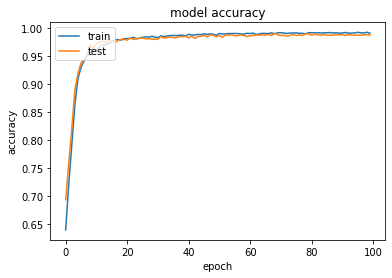

41/41 [==============================] - 0s 2ms/step


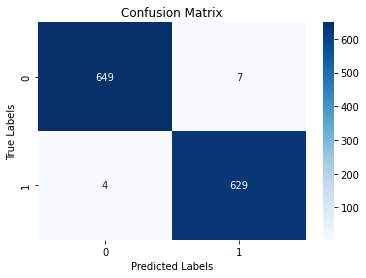

In [57]:
from scipy.sparse import coo_matrix
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns

def generate_regionC1(rad, thk, b, a, n_data_points):
    c1 = np.array([(rad + thk) / 2, 0])

    r1 = np.random.rand(n_data_points) * thk + rad
    a1 = np.random.rand(n_data_points) * np.pi + np.pi / 2

    p1 = np.array((r1 * np.cos(a1) + a, r1 * np.sin(a1)))
    x1, y1 = (p1[0] - c1[0], p1[1] - c1[1])

    return x1, y1
  
def generate_regionC2(rad, thk, b, a, n_data_points):
    c2 = np.array([-(rad + thk) / 2, 0])
    r2 = np.random.rand(n_data_points) * thk + rad
    a2 = np.random.rand(n_data_points) * np.pi - np.pi / 2
    p2 = np.array((r2 * np.cos(a2) + b, r2 * np.sin(a2) - 1))
    x2, y2 = (p2[0] - c2[0], p2[1] - c2[1])

    return x2, y2

def get_and_process_data():
    n_data_points = 2000

    C1 = generate_regionC1(1, 1, -1, 1, n_data_points)
    C2 = generate_regionC2(1, 1, -1, 1, n_data_points)
    Cg = generate_regionC2(0, 1, -0.5, 0.5, n_data_points)
    Cr = generate_regionC1(0, 1, -0.5, 0.5, n_data_points)
    ConC1 = np.concatenate((C1, Cg), axis=1)
    ConC2 = np.concatenate((C2, Cr), axis=1)

    data_C1 = pd.DataFrame(ConC1).T
    data_C1.columns = ['x1', 'y1']
    data_C1['class'] = '0'

    data_C2 = pd.DataFrame(ConC2).T
    data_C2.columns = ['x1', 'y1']
    data_C2['class'] = '1'

    train_dataC1, test_dataC1, pred_dataC1 = split_data(data_C1)
    train_dataC2, test_dataC2, pred_dataC2 = split_data(data_C2)

    train_data = pd.concat([train_dataC1, train_dataC2])
    test_data = pd.concat([test_dataC1, test_dataC2])
    red_data = pd.concat([pred_dataC1, pred_dataC2])
    X_train = train_data[['x1', 'y1']].values
    y_train = train_data['class'].values.astype(int)

    X_test = test_data[['x1', 'y1']].values
    y_test = test_data['class'].values.astype(int)

    X_pred = pred_data[['x1', 'y1']].values
    Y_pred = pred_data[['class']].astype(int).values

    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_pred = scaler.transform(X_pred)

    return X_train, y_train, X_test, y_test, X_pred, Y_pred

def split_data(data):
  train_data, test_data = train_test_split(data, test_size=0.2)
  pred_data = data.loc[~data.index.isin(train_data.index) & ~data.index.isin(test_data.index)]
  return train_data, test_data, pred_data

def create_model():
  model = Sequential([
  Dense(10, activation='relu', input_shape=(2,)),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid'),])
  optimizer = keras.optimizers.Adam(lr=0.01)
  model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

def train_and_evaluate(X_train, y_train, X_test, y_test, X_pred, Y_pred):
  model = create_model()
  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print(f"Test accuracy: {test_acc}")
  print("\n Evaluate model on test data")
  results = model.evaluate(testX, test_Y, batch_size=128)
  print("test loss, test acc:", results)

# summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  y_pred = model.predict(X_pred).round()
  predictions = [1 if p[0] >= 0.5 else 0 for p in y_pred]
  cm = confusion_matrix( Y_pred, predictions)
  sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.title("Confusion Matrix")
  plt.show()

def main():
  X_train, y_train, X_test, y_test, X_pred, Y_pred = get_and_process_data()
  train_and_evaluate(X_train, y_train, X_test, y_test, X_pred, Y_pred)

if __name__ == '__main__':
  main()